In [2]:
import cv2

image = cv2.imread("../0-Data/golden-gate.jfif")
image = cv2.resize(image, (1080, 720))
image.shape

(720, 1080, 3)

In [3]:
print(f"Height: {image.shape[0]} pixels")
print(f"Width: {image.shape[1]} pixels")
print(f"Colors channels: {image.shape[2]} pixels")

Height: 720 pixels
Width: 1080 pixels
Colors channels: 3 pixels


In [4]:
# Open window
cv2.imshow("Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# Save
cv2.imwrite("../0-Data/golden-gate-modified.jpeg", image)

True

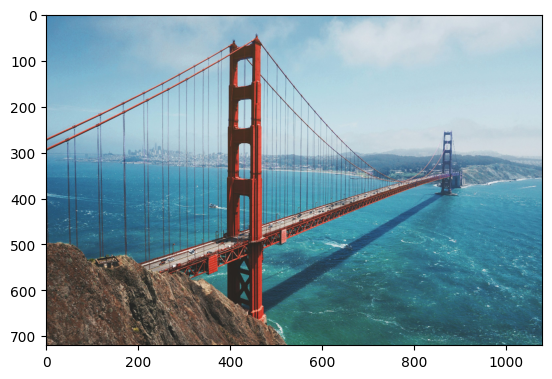

In [6]:
from matplotlib import pyplot as plt

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.show()

In [7]:
# Splitting color channels

(b, g, r) = cv2.split(image)

import numpy as np

zeros = np.zeros(image.shape[:2], dtype="uint8")
cv2.imshow("Red", cv2.merge([zeros, zeros, r]))
cv2.imshow("Green", cv2.merge([zeros, g, zeros]))
cv2.imshow("Blue", cv2.merge([b, zeros, zeros]))
cv2.waitKey(0)

merged = cv2.merge([b, g, r])
cv2.imshow("Merged", merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# Converting to gray scale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imshow("Gray", gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

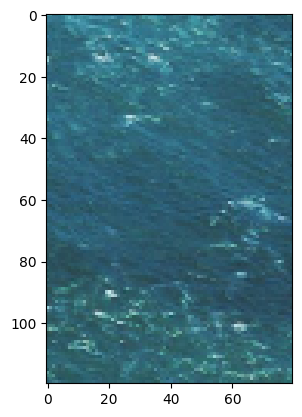

In [9]:
rectangle = image[600:800, 1000:1300]
image_rectangle_rgb = cv2.cvtColor(rectangle, cv2.COLOR_BGR2RGB)
plt.imshow(image_rectangle_rgb)
plt.show()

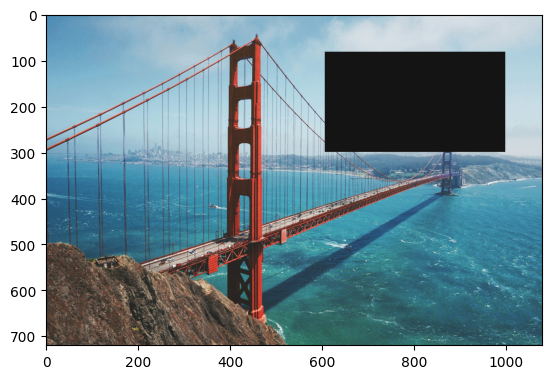

In [10]:
image_painted = image.copy()
image_painted[82:300, 607:1000] = (20, 20, 20)

image_painted_rgb = cv2.cvtColor(image_painted, cv2.COLOR_BGR2RGB)

plt.imshow(image_painted_rgb)
plt.show()

In [11]:
import numpy as np

figure = np.zeros((500, 500, 3), dtype="uint8")

green = (0, 255, 0)
red = (0, 0, 255)
blue = (255, 0, 0)
white = (255, 255, 255)
cv2.line(figure, (0, 0), (500, 500), green)
cv2.line(figure, (500, 0), (0, 500), red, 3)
cv2.rectangle(figure, (20, 20), (60, 60), green)
cv2.rectangle(figure, (10, 150), (100, 300), red, 5)
cv2.rectangle(figure, (400, 80), (480, 160), blue, -1)
for radius in range(0, 250, 25):
    cv2.circle(figure, (figure.shape[1] // 2, figure.shape[0] // 2), radius, white)

cv2.imshow("Figure", figure)
cv2.waitKey(0)
cv2.destroyAllWindows()

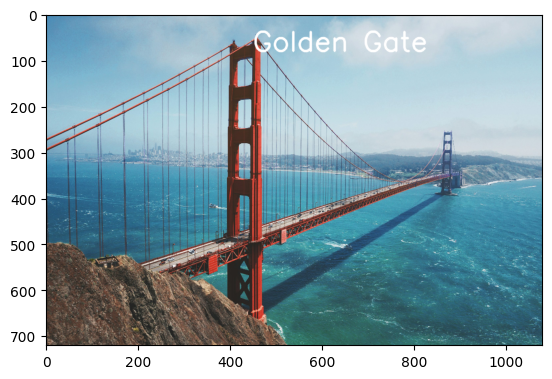

In [12]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
font = cv2.FONT_HERSHEY_SIMPLEX
line = cv2.LINE_AA
cv2.putText(image_rgb, "Golden Gate", (450, 80), font, 2, (255, 255, 255), 3, line)
plt.imshow(image_rgb)
plt.show()

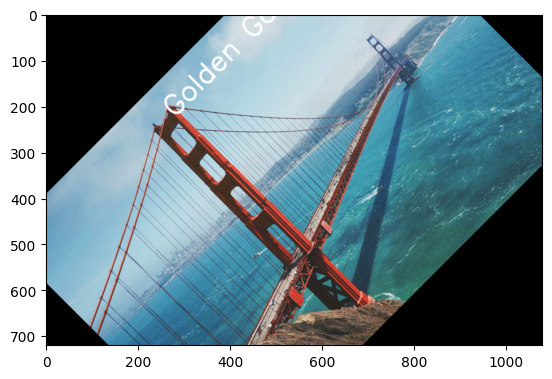

In [13]:
(height, width) = image_rgb.shape[:2]
mid = (width // 2, height // 2)

param_rot = cv2.getRotationMatrix2D(mid, 45, 1.0)
rotated = cv2.warpAffine(image_rgb, param_rot, (width, height))
plt.imshow(rotated)
plt.show()

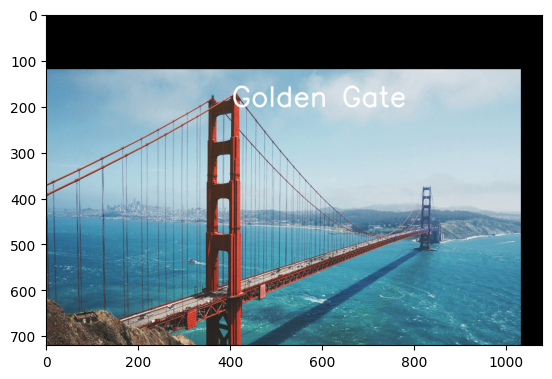

In [14]:
import numpy as np

param_shift = np.float32([[1, 0, -46], [0, 1, 120]])
moved = cv2.warpAffine(image_rgb, param_shift, (width, height))
plt.imshow(moved)
plt.show()

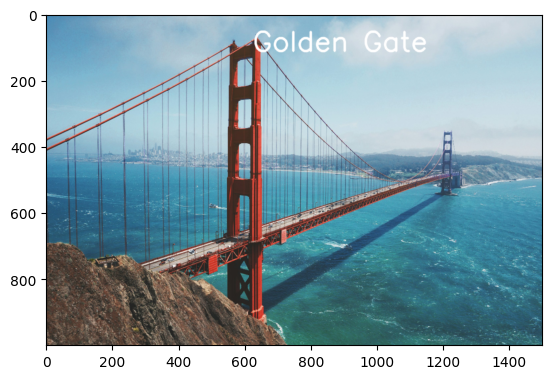

In [15]:
new_width = 1500

proportion = height / width
new_dim = (new_width, int(new_width * proportion))

resized = cv2.resize(image_rgb, new_dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized)
plt.show()

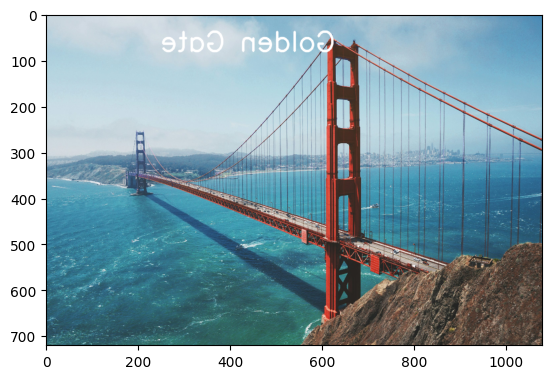

In [16]:
flipped = cv2.flip(image_rgb, 1)
plt.imshow(flipped)
plt.show()

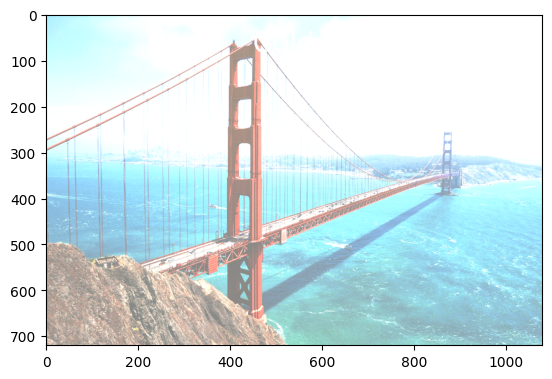

In [17]:
import numpy as np

matrix = np.ones(image_rgb.shape, dtype="uint8") * 100
sum = cv2.add(image_rgb, matrix)
plt.imshow(sum)
plt.show()

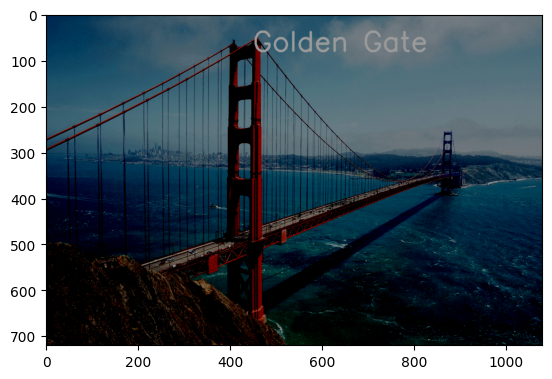

In [18]:
import numpy as np

matrix = np.ones(image_rgb.shape, dtype="uint8") * 100
sum = cv2.subtract(image_rgb, matrix)
plt.imshow(sum)
plt.show()

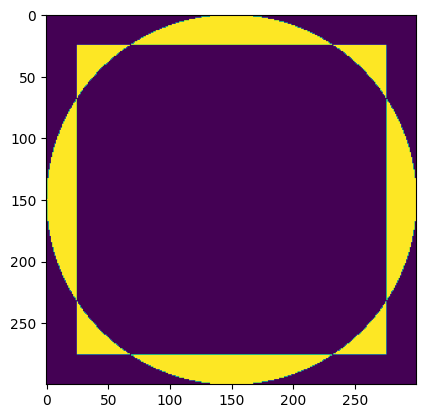

In [19]:
background = np.zeros((300, 300), dtype="uint8")
cv2.rectangle(background, (25, 25), (275, 275), 255, -1)
background2 = np.zeros((300, 300), dtype="uint8")
cv2.circle(background2, (150, 150), 150, 255, -1)

bitwise_AND = cv2.bitwise_and(background, background2)
bitwise_OR = cv2.bitwise_or(background, background2)
bitwise_XOR = cv2.bitwise_xor(background, background2)
bitwise_NOT = cv2.bitwise_not(background, background2)

plt.imshow(bitwise_XOR)
plt.show()

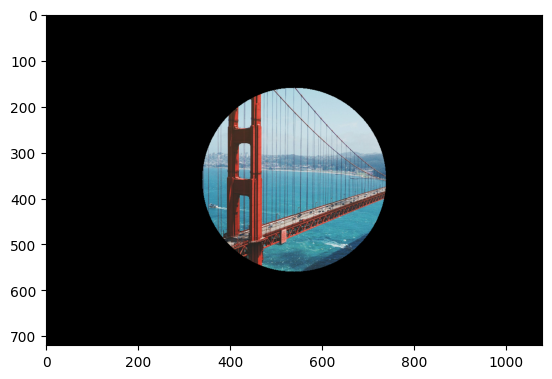

In [20]:
mask = np.zeros(image_rgb.shape[:2], dtype="uint8")
cv2.circle(mask, (image_rgb.shape[1] // 2, image_rgb.shape[0] // 2), 200, 255, -1)
new_image = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)
plt.imshow(new_image)
plt.show()

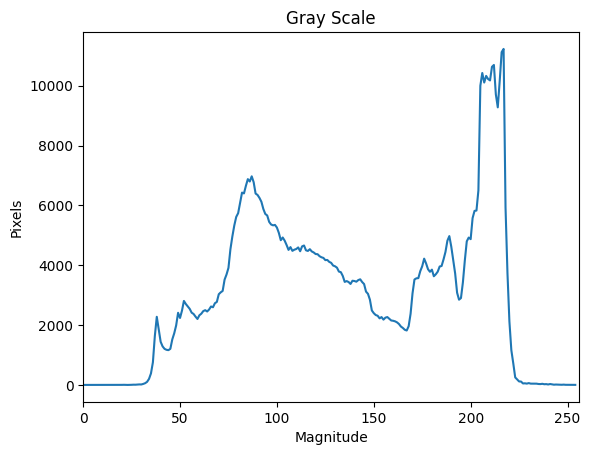

In [21]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
histogram = cv2.calcHist(
    images=[image_gray], channels=[0], mask=None, histSize=[255], ranges=[0, 255]
)

plt.figure()
plt.title("Gray Scale")
plt.xlabel("Magnitude")
plt.ylabel("Pixels")
plt.plot(histogram)
plt.xlim([0, 256])
plt.show()

In [22]:
equalized = cv2.equalizeHist(image_gray)

cv2.imshow("Gray", image_gray)
cv2.imshow("Equalized", equalized)
cv2.waitKey(0)
cv2.destroyAllWindows()

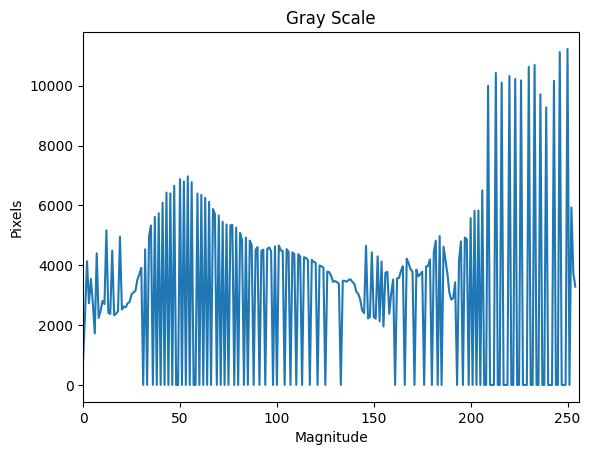

In [23]:
new_histogram = cv2.calcHist(
    images=[equalized], channels=[0], mask=None, histSize=[255], ranges=[0, 255]
)

plt.figure()
plt.title("Gray Scale")
plt.xlabel("Magnitude")
plt.ylabel("Pixels")
plt.plot(new_histogram)
plt.xlim([0, 256])
plt.show()

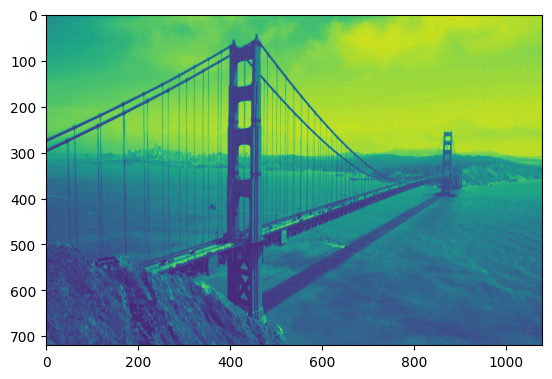

In [35]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
eroded = cv2.erode(image_gray.copy(), (5,5), iterations=3)
plt.imshow(eroded)
plt.show()

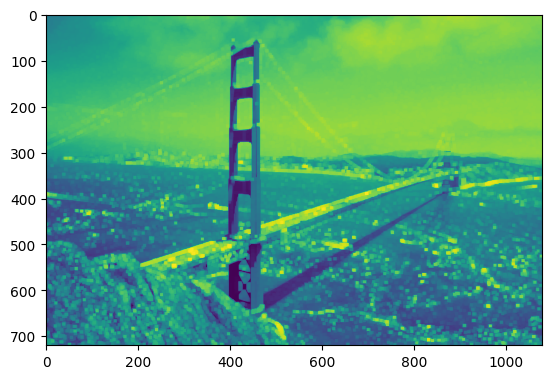

In [30]:
dilated = cv2.dilate(image_gray.copy(), None, iterations=3)
plt.imshow(dilated)
plt.show()

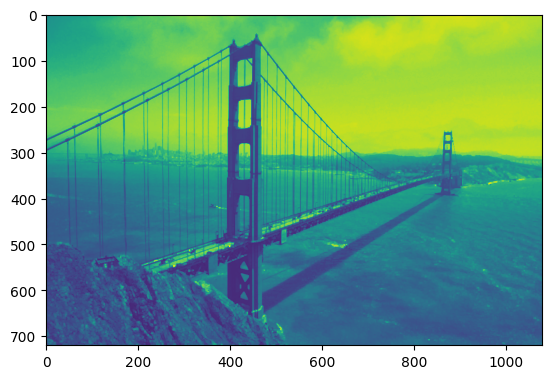

In [31]:
opened = cv2.morphologyEx(image_gray.copy(), cv2.MORPH_OPEN, None)
plt.imshow(opened)
plt.show()

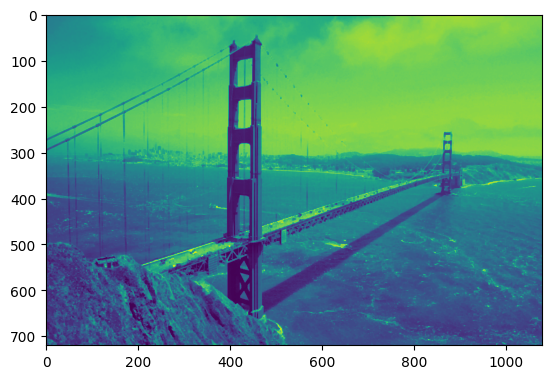

In [32]:
closed = cv2.morphologyEx(image_gray.copy(), cv2.MORPH_CLOSE, None)
plt.imshow(closed)
plt.show()

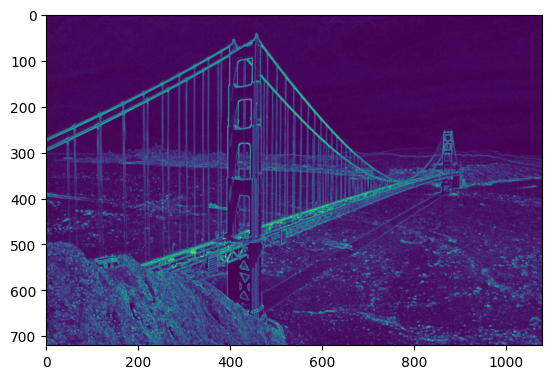

In [33]:
gradient = cv2.morphologyEx(image_gray.copy(), cv2.MORPH_GRADIENT, None)
plt.imshow(gradient)
plt.show()

In [37]:
image_filter = cv2.GaussianBlur(image_gray, (5,5), 0)

large = cv2.Canny(image_filter, 50, 220)
medium = cv2.Canny(image_filter, 70, 140)
close = cv2.Canny(image_filter, 210, 220)

cv2.imshow("large", large)
cv2.imshow("medium", medium)
cv2.imshow("close", close)
cv2.waitKey(0)
cv2.destroyAllWindows()